<h1 style="text-align:center">
NoSQL - MongoDB - PyMongo: Gym Members Exercise Dataset
</h1>

<h2 style="text-align:center">
Máster big data, data science & inteligencia artificial 2024-2025
</h2>

<h3 style="text-align:center">
José A. D'Orazio De Abreu
<br>
9 de Diciembre de 2024
</h3>

# Introducción

En este trabajo se analiza un conjunto de datos relacionado con el ejercicio físico. El análisis se centra principalmente en el índice de masa corporal (BMI), las calorías quemadas, la duración de las sesiones, la frequencia semanal del ejercicios y otros factores clave que influyen en la salud y el rendimiento físico de los individuos. 

El objetivo principal es comprender cómo estos factores se relacionan entre sí, identificar patrones y tendencias significativas y proponer estrategias que puedan mejorar los hábitos de ejercicio.

Explorar y analizar el comportamiento de los usuarios del gimnasio, con énfasis en identificar grupos específicos con sobrepeso o hábitos de ejercicio poco eficaces, para proporcionar insights útiles que permitan diseñar recomendaciones personalizadas y promover un estilo de vida saludable.

El link del Dataset es el siguiente:
https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset

## Librerías

In [1]:
from pymongo import MongoClient
import csv
import matplotlib.pyplot as plt
import pandas as pd

## MongoDB y PyMongo: Carga del fichero CSV

Para trabajar con MongoDB desde Python, es necesario utilizar la librería **pymongo**, la cual permite acceder al cliente y, posteriormente, a la colección. Dado que esta colección se encuentra alojada localmente, se emplea **"localhost"** y el puerto **27017** como configuración predeterminada de la conexión.

La importación del fichero puede realizarse de dos formas:
1. Directamente  desde el cliente de MongoDB Compass
2. Abriendo el archivo con Python y, posteriormente, insertando los datos en la colección previamente creada, denominada **youtube_collection**.

Para los efectos de este trabajo, dicha base de datos se identificará mediante la query **yt_db**.

In [2]:
client = MongoClient("localhost", 27017)
client = MongoClient(
    "mongodb://127.0.0.1:27017/?directConnection=true&serverSelectionTimeoutMS=2000"
    )
db = client.gym.db
gym_db = db.gym_collection
gym_db.drop()

In [3]:
with open("gym_members_exercise_tracking.csv", 'r', encoding = "latin1") as file_handler:
    csv_reader = csv.DictReader(file_handler)
    data = list(csv_reader)

gym_db.insert_many(data)
print("Dataset succesful")

Dataset succesful


## 2. Queries

Una vez insertado el dataset en MongoDB, se procedió a examinar su estructura y el contenido de su información. Para este análisis inicial, se utilizó la herramienta Schema de MongoDB Compass, que permite visualizar de manera clara la distribución de datos en los distintos campos y el formato en el que están almacenados.

Tras este análisis preliminar, se diseñaron una serie de consultas (queries) para obtener información clave sobre los usuarios y sus hábitos de ejercicio. Estas consultas están destinadas a responder preguntas específicas relacionadas con la actividad física registrada en el dataset.


### 1. Determinar el número total de personas registradas en el conjunto de datos.
Determinar la población total registrada en el dataset para establecer el alcance del análisis y validar la calidad de los datos disponibles.

In [4]:
total_people = gym_db.count_documents({})
print(f"Total de personas en el Dataset: {total_people}")

Total de personas en el Dataset: 973


### 2. Transformarción de datos
Para garantizar la correcta manipulación y análisis de los datos numéricos en el dataset, se realiza una transformación de aquellos campos almacenados como cadenas de texto (string) a tipos de datos numéricos, como enteros (int) o dobles (double), según corresponda. Esto permite realizar cálculos, comparaciones y agregaciones de manera precisa en consultas posteriores.

En esta consulta se transforman los siguientes campos:

- `Age`: Convertido a entero (int) para permitir análisis por rangos de edad.
- `BMI`: Convertido a doble (double), ya que puede contener valores decimales para mayor precisión.
- `Session_Duration` (hours): Convertido a doble (double) para manejar datos sobre la duración de las sesiones con decimales.
- `Workout_Frequency` (days/week): Convertido a doble (double) para representar la frecuencia semanal de ejercicio de forma precisa.
- `Weight` (kg) y `Height` (m): Convertidos a doble (double) por ser valores físicos que usualmente se expresan con decimales.

In [5]:
gym_db.update_many(
    {
        "$and": [
            {"Age": {"$exists": True}},
            {"BMI": {"$exists": True}},
            {"Session_Duration (hours)": {"$exists": True}},
            {"Workout_Frequency (days/week)": {"$exists": True}},
            {"Weight (kg)": {"$exists": True}},
            {"Height (m)": {"$exists": True}}
        ]
    },
    [
        {
            "$set": {
                "Age": {"$toInt": "$Age"},
                "BMI": {"$toDouble": "$BMI"},
                "Session_Duration_hours":{"$toDouble": "$Session_Duration (hours)"},
                "Workout_Freq":{"$toDouble": "$Workout_Frequency (days/week)"},
                "Weight": {"$toDouble": "$Weight (kg)"},
                "Height": {"$toDouble": "$Height (m)"}
            }
        }
    ]
)

UpdateResult({'n': 973, 'nModified': 973, 'ok': 1.0, 'updatedExisting': True}, acknowledged=True)

El mensaje anterior nos informa que la colección fue actualizada exitosamente.

### 3. Clasificación de Personas según el BMI y Rango de Edad

En este análisis, se clasifica a las personas en función de su índice de masa corporal (BMI) y dentro de un rango de edad determinado. Se utiliza la clasificación estándar de BMI: bajo peso, normal, sobrepeso y obesidad. Además, se enfoca en el grupo de personas con edades comprendidas entre 25 y 65 años, ya que este es el rango de edad predominante en la población laboral activa.

El código siguiente clasifica a las personas dentro de estos grupos y calcula la cantidad de personas en cada categoría. Posteriormente, se genera una visualización que muestra la distribución de BMI en este rango de edad.

Consulta para obtener personas en el rango de edad de 25 a 65 años:
    Se cuenta cuántas personas se encuentran dentro de este rango de edad.
Clasificación de BMI
Se cuentan las personas en cada categoría de BMI:
- Bajo peso (BMI < 18.5)
- Normal (18.5 ≤ BMI < 24.9)
- Sobrepeso (24.9 ≤ BMI < 29.9)
- Obesidad (BMI ≥ 29.9)

A continuación, se visualiza un gráfico de barras que representa la distribución de personas en cada categoría de BMI. Se utiliza un esquema de colores para facilitar la interpretación del gráfico, con colores correspondientes a cada categoría: naranja para bajo peso, verde para normal, amarillo para sobrepeso y rojo para obesidad.

Personas en este rango: 808


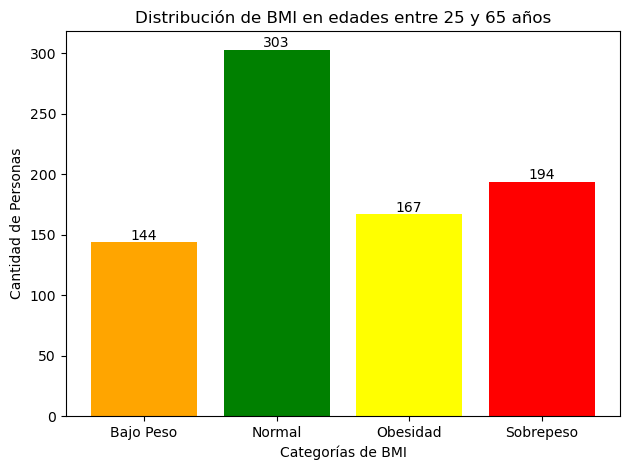

Total de Personas en Sobrepeso y Obesidad 361, esto equivale a un 44.68 % del total de personas.


In [6]:
p_entre_25_65 = gym_db.count_documents({"Age": {"$gte": 25, "$lte": 65}})
print(f"Personas en este rango: {p_entre_25_65}")
p_bajopeso_años = gym_db.count_documents({"BMI":{"$lt": 18.5}, "Age": {"$gte": 25, "$lte": 65}})
p_normal_años = gym_db.count_documents({"BMI":{"$gte": 18.5, "$lt":24.9}, "Age": {"$gte": 25, "$lte": 65}})
p_sobrepeso_años = gym_db.count_documents({"BMI":{"$gte": 24.9, "$lt":29.9}, "Age": {"$gte": 25, "$lte": 65}})
p_obseidad_años = gym_db.count_documents({"BMI":{"$gt": 29.9}, "Age": {"$gte": 25, "$lte": 65}})

bmi = {
    "Bajo Peso": p_bajopeso_años,
    "Normal": p_normal_años,
    "Obesidad": p_obseidad_años,
    "Sobrepeso": p_sobrepeso_años
}

categories = list(bmi.keys())
values = list(bmi.values())

plt.bar(categories,values, color = ["orange", "green", "yellow", "red"])
plt.title("Distribución de BMI en edades entre 25 y 65 años")
plt.xlabel("Categorías de BMI")
plt.ylabel("Cantidad de Personas")
for i, v in enumerate(values):
    plt.text(i, v + 2, str(v), ha = "center", fontsize = 10)
plt.tight_layout()
plt.show()

print(f"Total de Personas en Sobrepeso y Obesidad {bmi["Sobrepeso"] + bmi["Obesidad"]}, esto equivale a un {round((bmi["Sobrepeso"] + bmi["Obesidad"])*100/p_entre_25_65, 2)} % del total de personas.")

A través de la gráfica, podemos observar claramente que el número de personas clasificadas en las categorías de sobrepeso y obesidad supera al de las personas con un BMI normal. Este hallazgo es interesante para nuestra investigación, ya que el enfoque está en entender mejor las características y el comportamiento de los grupos con sobrepeso y obesidad. Por lo tanto, se continuará el análisis centrado en estos grupos específicos.

### 4. Segmentación por Género y Edad
El objetivo de esta consulta es identificar los 3 grupos con el mayor BMI promedio segmentados por género y edad (entre 25 y 65 años). Se filtran los datos para incluir solo personas con un BMI superior a 24.9 y dentro del rango de edad laboral, y luego se agrupan para calcular el promedio de BMI de cada grupo. Finalmente, se ordenan los grupos por el promedio de BMI de mayor a menor.

In [7]:
pipeline = [
    {
        "$match":{ "BMI": {"$gt": 24.9}, "Age": {"$gte": 25, "$lte": 65}}
    },
    {
        "$group":
        {
            "_id": {"Gender": "$Gender", "Age": "$Age"},
            "Total_People": {"$sum": 1},
            "Avg_Overweight": {"$avg": "$BMI"}
        }
    },
    {
        "$sort": {"Avg_Overweight": -1}
    },
    {
        "$limit": 3
    }
]

result = list(gym_db.aggregate(pipeline))
df = pd.DataFrame(result)
df.columns = ["Género y Edad", "Total de Personas", "BMI Promedio"]
df["BMI Promedio"] = df["BMI Promedio"].round(2)
df

,Género y Edad,Total de Personas,BMI Promedio
0,"{'Gender': 'Male', 'Age': 33}",4,37.23
1,"{'Gender': 'Male', 'Age': 51}",4,35.55
2,"{'Gender': 'Male', 'Age': 56}",13,34.34


El análisis revela que el género con el mayor BMI corresponde a los hombres, específicamente en los grupos de edades de **33, 51 y 56 años**. Aunque los grupos de **33 y 51 años** presentan un BMI promedio más alto en comparación con el de **56 años**, este último destaca por tener un mayor número de personas con sobrepeso. En el grupo de **56 años**, 13 personas alcanzan un BMI promedio de **34.34**.

### 5. 	Relación entre frecuencia de ejercicio y sobrepeso
Esta consulta analiza los patrones de ejercicio de los individuos con un índice de masa corporal (BMI) superior a 24.9 y en el rango de edad de 25 a 65 años. El objetivo es identificar la intensidad y tipo de ejercicio más comunes en estos grupos, para detectar tendencias y proporcionar recomendaciones para mejorar los hábitos de ejercicio. Los resultados anteriores destacan a los hombres de las edades 33, 51 y 56 años como los grupos más relevantes dentro de este análisis.

In [8]:
pipeline = [
    {
        "$match":{
            "BMI": {"$gt": 24.9},
            "Age": {"$gte": 25, "$lte": 65}
            }
    },
    {
        "$addFields":{
            "Weekly_Hours":{
                "$multiply": ["$Session_Duration_hours", "$Workout_Freq"]}
        }
    },
    {
        "$addFields":{
            "Intensity":{
                "$switch":{
                    "branches": [
                        {"case":{ "$and":[
                                {"$gte": ["$Weekly_Hours", 0]},
                                {"$lt": ["$Weekly_Hours", 2.5]}
                                ]}, "then": "light"},
                        {"case":{ "$and":[
                                {"$gte": ["$Weekly_Hours", 2.5]},
                                {"$lt": ["$Weekly_Hours", 5.0]}
                                ]}, "then": "moderate"}
                    ],
                    "default": "intense"
                }
            }
        }
    },
    {
        "$group":
        {
            "_id": {"Gender": "$Gender", "Age": "$Age"},
            "Weekly_Hours": {"$sum": "$Weekly_Hours"},
            "Avg_BMI": {"$avg": "$BMI"},
            "Members": {
                "$push":{
                    "Age": "$Age",
                    "Height": "$Height",
                    "Weight": "$Weight",
                    "BMI": "$BMI",
                    "Workout_Type": "$Workout_Type",
                    "Weekly_Hours": "$Weekly_Hours",
                    "Intensity": "$Intensity"
                }
            }
        }
    },
    {
        "$sort": {"Avg_BMI": -1}
    },
    {
        "$limit": 3
    },
    {
        "$project":
        {
            "_id": 1,
            "Total_People": 1,
            "Avg_BMI": 1,
            "Members": 1
        }
    }
]

result = list(gym_db.aggregate(pipeline))
members_overweight = []
for data in result:
    members_overweight.extend(data["Members"])

df = pd.DataFrame(members_overweight)
df.columns = ["Edad", "Altura" , "Peso", "BMI" , "Tipo de Ejercicio", "Horas Semanales", "Intensidad"]
df.head()
df



,Edad,Altura,Peso,BMI,Tipo de Ejercicio,Horas Semanales,Intensidad
0,33,1.61,117.0,45.14,HIIT,3.12,moderate
1,33,1.99,113.6,28.69,Strength,2.76,moderate
2,33,1.60,106.5,41.60,Strength,5.60,intense
3,33,1.75,102.6,33.50,HIIT,4.20,moderate
4,51,1.78,109.3,34.50,Strength,1.62,light
5,51,1.67,115.3,41.34,Yoga,4.14,moderate
6,51,1.77,102.6,32.75,HIIT,2.42,light
7,51,1.62,88.2,33.61,Cardio,6.24,intense
8,56,1.71,88.3,30.20,Yoga,6.76,intense
9,56,1.78,129.0,40.71,Yoga,2.58,moderate


 En esta consulta, el objetivo era investigar la relación entre el sobrepeso y la frecuencia de ejercicio. Sin embargo, los resultados indican que la mayoría de las personas en este grupo entrenan con regularidad, al menos con una intensidad moderada, dedicando entre 2.5 y 5.0 horas semanales a sus rutinas de ejercicio. Esto sugiere que, a pesar de su condición de sobrepeso o obesidad, muchas de estas personas están comprometidas con su actividad física semanal. Esto puede indicar que su sobrepeso no se debe exclusivamente a realizar poca actividad física.

### 6. Relación entre altura y BMI
La consulta agrupa los datos por altura, calculando el BMI promedio y el número de personas en cada grupo. Los resultados se ordenan de menor a mayor altura para facilitar la identificación de las alturas asociadas con un mayor BMI promedio. 

In [9]:
pipeline = [
    {
        "$match": {
            "BMI": {"$gte": 24.9},
        }
    },
    {
    "$group":
    {
        "_id": "$Height",
        "Avg_BMI": {"$avg": "$BMI"},
        "Count": {"$sum": 1}
    }},
    {
        "$sort": {"Avg_BMI": -1}
    },
    {
        "$limit": 10
    }
]

result = gym_db.aggregate(pipeline)
df = pd.DataFrame(result)
df.columns = ["Altura", "BMI Promedio", "Numero de Personas"]
df["BMI Promedio"] = df["BMI Promedio"].round(2)
df

,Altura,BMI Promedio,Numero de Personas
0,1.63,34.29,16
1,1.69,33.38,13
2,1.73,33.34,10
3,1.65,32.96,8
4,1.83,32.94,6
5,1.62,32.48,25
6,1.89,32.46,3
7,1.61,32.36,18
8,1.67,32.28,13
9,1.75,32.00,3


Al observar los resultados, se puede inferir que las personas con menor estatura tienden a presentar un mayor índice de masa corporal (BMI), lo que sugiere una correlación entre la altura y la prevalencia del sobrepeso. En particular, las personas con alturas más bajas (por debajo de 1.75 m) tienen un BMI promedio significativamente más alto, lo que podría indicar una mayor propensidad a sufrir de sobrepeso en comparación con aquellos de mayor estatura.

### 7.   Análisis de Calorías Quemadas por Tipo de Ejercicio
Esta consulta agrupa los datos por tipo de ejercicio, calculando el promedio de calorías quemadas, la duración promedio de las sesiones y el número total de participantes. El análisis de estos resultados permite identificar tendencias en la efectividad y popularidad de cada actividad, facilitando la toma de decisiones para optimizar programas de entrenamiento.

  Actividad  Calorías Promedio  Duración Promedio  Total De Personas
0    Cardio             884.51               1.22                255
1      HIIT             925.81               1.29                221
2      Yoga             903.19               1.26                239
3  Strength             910.70               1.26                258


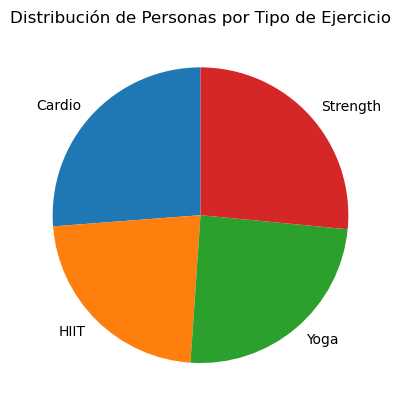

In [10]:
pipeline = [
    {
        "$set":
        {
            "Calories": {"$toDouble": "$Calories_Burned"}
        }
    },
    {
        "$group":
        {
            "_id": "$Workout_Type",
            "Avg_Calories": {"$avg": "$Calories"},
            "Avg_Duration": {"$avg": "$Session_Duration_hours"},
            "Total_People": {"$sum": 1}
        }

    }
]

result = gym_db.aggregate(pipeline)
df = pd.DataFrame(result)
df.columns = ["Actividad", "Calorías Promedio", "Duración Promedio", "Total De Personas"]
df[["Calorías Promedio", "Duración Promedio"]] = df[["Calorías Promedio", "Duración Promedio"]].round(2)
print(df)


labels = df["Actividad"]
total = df["Total De Personas"]

# Crear el pie chart
plt.pie(total, labels = labels, startangle = 90)
plt.title("Distribución de Personas por Tipo de Ejercicio")
plt.show()


El análisis de las actividades físicas revela que, en promedio, las personas que practican HIIT consumen más calorías (925.81) en comparación con aquellas que realizan las otras actividades. A pesar de la ligera diferencia en el consumo calórico, la duración promedio de las sesiones es bastante similar para todas las actividades, oscilando entre 1.22 y 1.29 horas. En términos de participación, Strength y Cardio son las actividades con más personas practicándolas, con 258 y 255 participantes, respectivamente. Este análisis sugiere que, aunque HIIT genera un mayor gasto calórico, las actividades como Strength y Cardio son igualmente populares entre los participantes.

## Conclusión

A lo largo de este análisis, hemos explorado la relación entre el índice de masa corporal (BMI), la actividad física y los hábitos de ejercicio entre los individuos con sobrepeso y obesidad. A través de múltiples consultas y transformaciones de datos, identificamos tendencias clave en las características físicas y los patrones de ejercicio de los participantes, especialmente en el grupo de hombres de edades comprendidas entre los 33 y 56 años, quienes presentan un BMI superior a 24.9.

Los resultados revelaron que, en general, las personas con sobrepeso tienden a realizar actividades físicas moderadas a intensas, dedicando entre 2.5 y 5 horas semanales a sus entrenamientos, con una preferencia destacada por actividades como **Cardio** y **Strength**. A pesar de las diferencias en las calorías consumidas entre los tipos de ejercicio, todos los grupos se mantienen activos con una duración de sesiones similar, lo que demuestra un compromiso constante con el ejercicio.

En términos de características físicas, se observó que las personas con mayor BMI tienden a tener una altura promedio ligeramente inferior a la de aquellos con un BMI más bajo. Este patrón sugiere que la altura podría influir en el riesgo de sobrepeso, aunque se necesita más investigación para confirmar esta relación.

En resumen, los resultados destacan la importancia de mantener una actividad física regular y moderada para la gestión del peso y el bienestar general. Además, las recomendaciones basadas en las actividades realizadas por los participantes podrían ayudar a mejorar la efectividad de los programas de ejercicio diseñados para personas con sobrepeso y obesidad.